In [1]:
from floridaman import data_cleaning
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load data
raw_data = data_cleaning.load('null_transformed')

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [4]:
max_score = 0

print("Training progress: ", end = '')
for COL_DROP in range(1,100,5):
    print('*', end = '')
    for IMPUTE in range(1, COL_DROP, 5):
        for NEIGHBOR in range(1, 20, 5):
            COL_DROP = COL_DROP/100
            IMPUTE = IMPUTE/100
            
            try:
                this_data = data_cleaning.generate_candidate_dataset(raw_data, COL_DROP, IMPUTE, NEIGHBOR)

                this_data = data_cleaning.balance(this_data)

                X = np.array(this_data[data_cleaning.features(this_data)])
                y = np.array(this_data['FAILURETYPE'])

                knn = KNeighborsClassifier(n_neighbors=NEIGHBOR)
                this_score = cross_val_score(knn, X, y, cv=8, scoring='roc_auc_ovo')
                this_score = this_score.mean()

                if (this_score > max_score):

                    best_mode = [knn, COL_DROP, IMPUTE, NEIGHBOR, this_score]
            except:
                print("Iteration with parameters COL_DROP=" + COL_DROP + ", IMPUTE=" + IMPUTE + "failed.")

Training progress: ********************

In [19]:
COL_DROP = .36
IMPUTE = .8
NEIGHBOR = 5

this_data = data_cleaning.generate_candidate_dataset(raw_data, COL_DROP, IMPUTE, NEIGHBOR)

this_data = data_cleaning.balance(this_data)

X = np.array(this_data[data_cleaning.features(this_data)])
y = np.array(this_data['FAILURETYPE'])

knn = KNeighborsClassifier(n_neighbors=NEIGHBOR)
this_score = cross_val_score(knn, X, y, cv=8, scoring='roc_auc_ovo')
this_score = this_score.mean()

best_mode = [knn, COL_DROP, IMPUTE, NEIGHBOR, this_score]

best_mode

[KNeighborsClassifier(), 0.36, 0.8, 5, 0.6296233974358973]

In [5]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

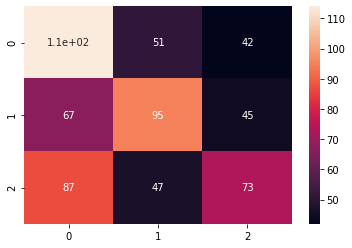

In [9]:
y_pred = cross_val_predict(best_mode[0], X, y, cv=best_mode[3])

conf_mat = confusion_matrix(y, y_pred)
sns.heatmap(conf_mat, annot=True)

In [10]:
best_mode[4]

0.623192184418146